# Projeto 3
***

### Análise de projetos no Kickstarter

As análises feitas a seguir foram feitas a partir do seguinte dataset:

- https://www.kaggle.com/kemical/kickstarter-projects

**Objetivo deste estudo:** Descobrir a probabilidade de sucesso de um projeto no kickstarter.

In [1]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Análise Exploratória:

In [2]:
#Importado o arquivo
df = pd.read_csv('ks-projects-201612.csv', encoding='iso-8859-1', low_memory=False)

In [3]:
linhas,colunas = df.shape
print("O Dataframe tem {0} linhas por {1} colunas.".format(linhas,colunas))

O Dataframe tem 323750 linhas por 17 colunas.


In [4]:
#Removendo os espaços em branco dos nomes das colunas:
df.columns = [x.strip() for x in df.columns.tolist()]

In [5]:
#Procurando por valores nulos que podem causar problemas posteriores:
print('Valores nulos na coluna "name":', df["name"].isnull().any(), '\nValores nulos na coluna "category":', df["category"].isnull().any())

Valores nulos na coluna "name": True 
Valores nulos na coluna "category": True


In [6]:
#Removendo os valores nulos:
df = df.dropna( axis=0, subset=['name', 'category'])
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN


In [7]:
#Removendo as ultimas 4 colunas extras:
df = df.iloc[:,:-4]

In [8]:
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220


### Análise das categorias mais recorrentes

In [9]:
print("O dataset possui {0} categorias. Sendo {1} categorias principais.".format(len(df.category.unique()),len(df.main_category.unique())))
#print(df['category'].unique())
#print(df['main_category'].unique()) 

O dataset possui 770 categorias. Sendo 119 categorias principais.


In [10]:
#Encontrando as categorias com maior número de projetos:
Top_categories = df.category.value_counts().head(10)

#Encontrando as categorias principais com maior número de projetos:
Top_Main_categories = df.main_category.value_counts().head(10)

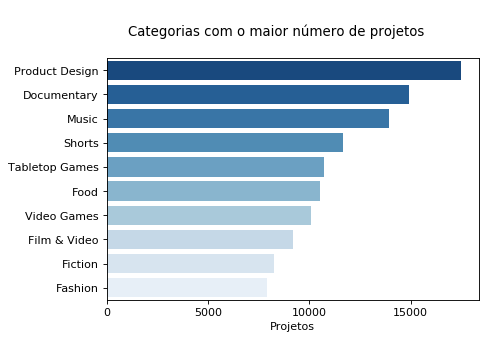

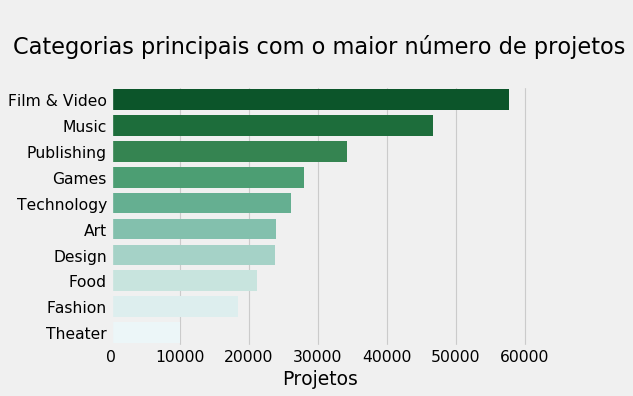

In [11]:
#Ploatndo um gráfico com as categorias principais com mais projetos:
fig = plt.figure(dpi = 80)
ax  = sns.barplot(x = Top_categories.values, y = Top_categories.index, palette="Blues_r", data = df)
plt.xlabel("Projetos")
plt.title("\nCategorias com o maior número de projetos"+(8*" ")+"\n")
plt.style.use('fivethirtyeight')
plt.show()

#Ploatndo um gráfico com as categorias principais com mais projetos:
fig = plt.figure(dpi=80)
ax  = sns.barplot(x = Top_Main_categories.values, y = Top_Main_categories.index, palette="BuGn_r", data = df)
plt.xlabel("Projetos")
plt.title("\nCategorias principais com o maior número de projetos\n")
plt.style.use('fivethirtyeight')
plt.show()

### Análise dos paises de maior número de projetos

In [12]:
df[~df.country.str.contains('^[A-Z]{2}$', case=False)].country.value_counts();

In [13]:
replace = df[~df.country.str.contains('^[A-Z]{2}$', case=False)].country.unique().tolist()
df.loc[:,'country'] = df.country.replace(to_replace=replace, value='Não especificado')

In [14]:
df.country.value_counts();

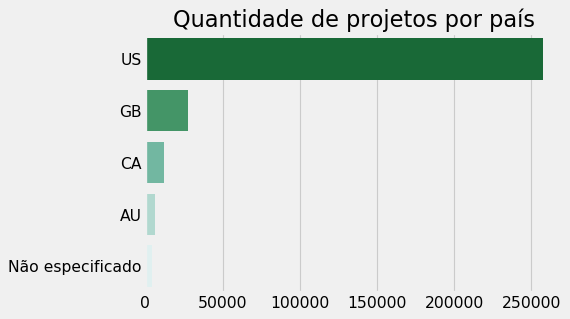

In [15]:
plt.style.use('fivethirtyeight')
COUNTRY = df.country.value_counts().head(5)
fig = plt.figure(dpi = 80)
ax  = sns.barplot(x = COUNTRY.values, y = COUNTRY.index, palette="BuGn_r", data = df);
plt.title("Quantidade de projetos por país")
plt.show()